# DIABETES PREDIKSI


## Business Understanding

Membuat sebuah model machine learning untuk predictive analytics

## Data Understanding

Dalam proyek ini, dataset yang digunakan adalah [Dataset](https://www.kaggle.com/datasets/whenamancodes/predict-diabities). Dataset ini terdiri dari 768 baris dengan 9 kolom.

Berikut adalah rincian dari dataset tersebut:

| kolom                        | Deskripsi                                                           |
| ---------------------------- | ------------------------------------------------------------------- |
| **Pregnancies**              | Jumlah kehamilan yang pernah dialami                                |
| **Glucose**                  | Tingkat glukosa dalam darah                                         |
| **BloodPressure**            | Tekanan darah (dalam mm Hg)                                         |
| **SkinThickness**            | Ketebalan lipatan kulit (dalam mm)                                  |
| **Insulin**                  | Kadar insulin dalam darah (dalam mu U/ml)                           |
| **BMI**                      | Indeks massa tubuh (Body Mass Index)                                |
| **DiabetesPedigreeFunction** | Skor riwayat keturunan diabetes                                     |
| **Age**                      | Usia pasien (dalam tahun)                                           |
| **Outcome**                  | Hasil diagnosa (1 = Mengidap diabetes, 0 = Tidak mengidap diabetes) |


## import library

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

## Gathering Data

In [4]:
# Masukkan Dataset yang digunakan dan lihat 5 baris pertama nya
df = pd.read_csv('/content/diabetesprediksi.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Assesing & Data Cleaning

### Data Assessing (Penilaian Data)
Pada tahap ini dilakukan proses eksplorasi terhadap struktur dan kualitas data. Fokus utamanya yaitu:

* Memeriksa apakah ada data yang hilang (missing values).

* Mengidentifikasi duplikasi data.

* Menemukan nilai-nilai yang tidak valid atau outlier.

* Menilai apakah data ini cocok untuk dianalisis lebih lanjut atau dibutuhkan penyesuaian terlebih dahulu.


### Data Cleaning (Pembersihan Data)
Tahap ini bertujuan untuk memperbaiki permasalahan yang ditemukan saat penilaian data. Langkah-langkah yang dilakukan antara lain:

* Mengisi atau menghapus nilai yang hilang sesuai konteks.

* Menghapus data duplikat agar tidak mempengaruhi analisis.

* Menyesuaikan format data agar seragam (misalnya desimal, satuan, kapitalisasi).

* Menangani nilai ekstrim atau tidak wajar agar tidak menyesatkan model.

In [5]:
# Melihat jumlah baris dan kolom pada dataset
df.shape

(768, 9)

In [6]:
# Menampilkan informasi tentang DataFrame, termasuk jumlah nilai non-null, tipe data, dan penggunaan memori
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Menghitung jumlah nilai yang hilang (NaN) di setiap kolom DataFrame
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [8]:
# Menghitung jumlah baris duplikat dalam DataFrame
df.duplicated().sum()

np.int64(0)

In [9]:
# Menampilkan statistik ringkasan dari DataFrame
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Berdasarkan proses penilaian data (data assessing) dan pembersihan data (data cleaning) yang telah dilakukan, pada dataset yang digunakan tidak ditemukan nilai yang hilang (missing values) maupun data yang duplikat.

Kemudian, dengan menggunakan fungsi info(), kita dapat mengidentifikasi fitur-fitur yang terdapat dalam dataset, yang meliputi: Pregnancies, Glucose, Blood Pressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, dan Outcome.

Selain itu, dengan menggunakan fungsi describe(), kita bisa mendapatkan ringkasan statistik dari dataset yang digunakan, seperti nilai rata-rata (mean), standar deviasi (standard deviation), nilai minimum (min), nilai maksimum (max), dan lainnya.

## Exploratory Data Analysis (EDA)

Analisis Data Eksplorasi (Exploratory Data Analysis/EDA) adalah proses investigasi awal terhadap data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi dalam data. Teknik ini biasanya menggunakan bantuan statistik serta representasi grafis atau visualisasi.

Pada kode di bawah ini, kita akan mengetahui bagaimana perbandingan jumlah orang yang memiliki diabetes dan yang tidak memiliki diabetes.

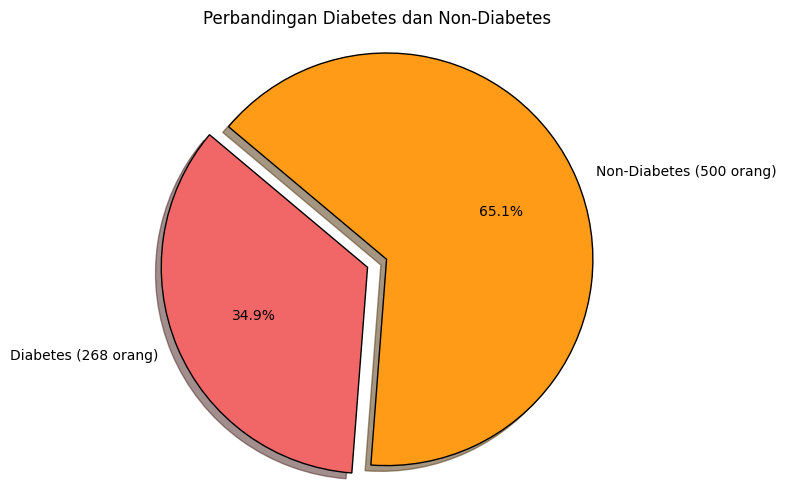

In [10]:
# Pisahkan data berdasarkan nilai Outcome
diabetes = df[df['Outcome'] == 1]
non_diabetes = df[df['Outcome'] == 0]

# Hitung jumlah data untuk masing-masing kelompok
num_diabetes = len(diabetes)
num_non_diabetes = len(non_diabetes)

# Buat label dengan tambahan informasi jumlah orang
labels = [f'Diabetes ({num_diabetes} orang)', f'Non-Diabetes ({num_non_diabetes} orang)']
sizes = [num_diabetes, num_non_diabetes]
colors = ['#F16767', '#FF9B17']
explode = (0.1, 0)  # Pisahkan potongan "Diabetes" sedikit

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.axis('equal')  # Pastikan pie chart berbentuk lingkaran
plt.title('Perbandingan Diabetes dan Non-Diabetes')
plt.show()


#### Membuat histogram untuk setiap kolom numerik dalam DataFrame

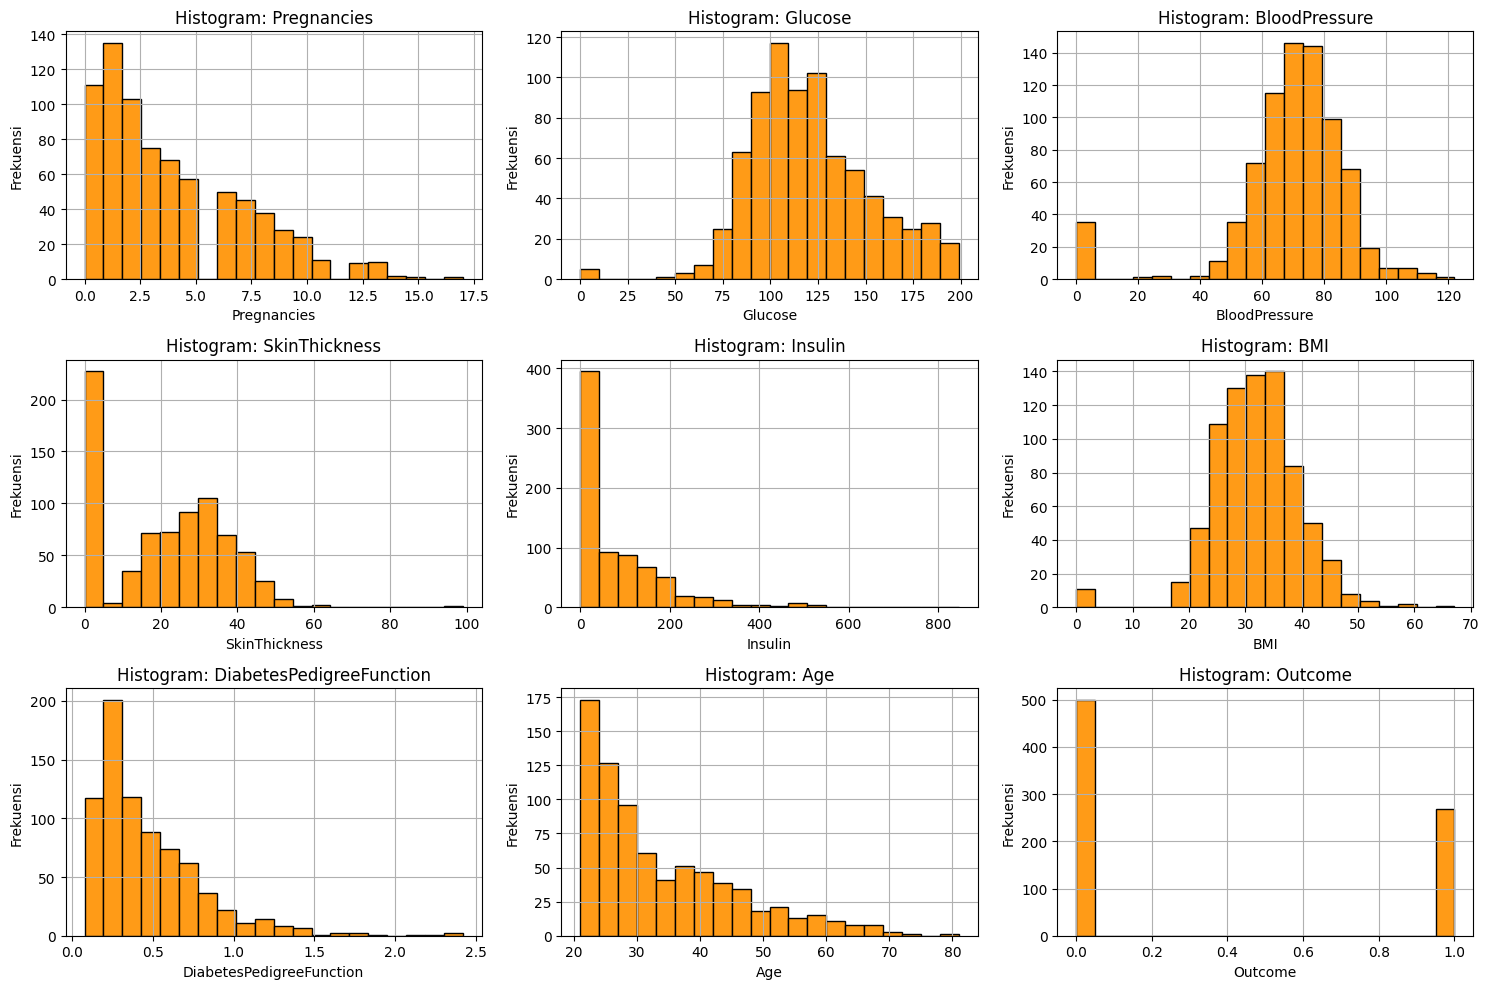

In [11]:
# Menentukan kolom numerik yang ada di DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Membuat histogram untuk setiap kolom numerik
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)  # Mengatur layout subplot dalam grid 3x3
    df[col].hist(bins=20, color='#FF9B17', edgecolor='black')  # Menggunakan warna yang konsisten
    plt.title(f'Histogram: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()  # Menyesuaikan layout agar tidak tumpang tindih
plt.show()

Kode di bawah ini bertujuan untuk menghitung korelasi antara kolom numerik dalam DataFrame df dan kemudian mengurutkannya berdasarkan korelasi dengan kolom 'Outcome'.

Jika koefisien korelasi mendekati +1, ini menunjukkan hubungan positif antara dua variabel. Artinya, ketika satu variabel meningkat, kemungkinan variabel lainnya juga akan meningkat. Sebaliknya, jika koefisien korelasi mendekati -1, ini menunjukkan hubungan negatif antara dua variabel. Artinya, ketika satu variabel meningkat, variabel lainnya cenderung menurun.

Jika koefisien korelasi mendekati 0, ini menunjukkan bahwa tidak ada hubungan linier antara dua variabel. Namun, penting untuk diingat bahwa tidak adanya korelasi linier tidak berarti tidak ada hubungan sama sekali; itu hanya berarti bahwa hubungan tersebut tidak dapat dijelaskan dengan cara yang sama seperti hubungan positif atau negatif.

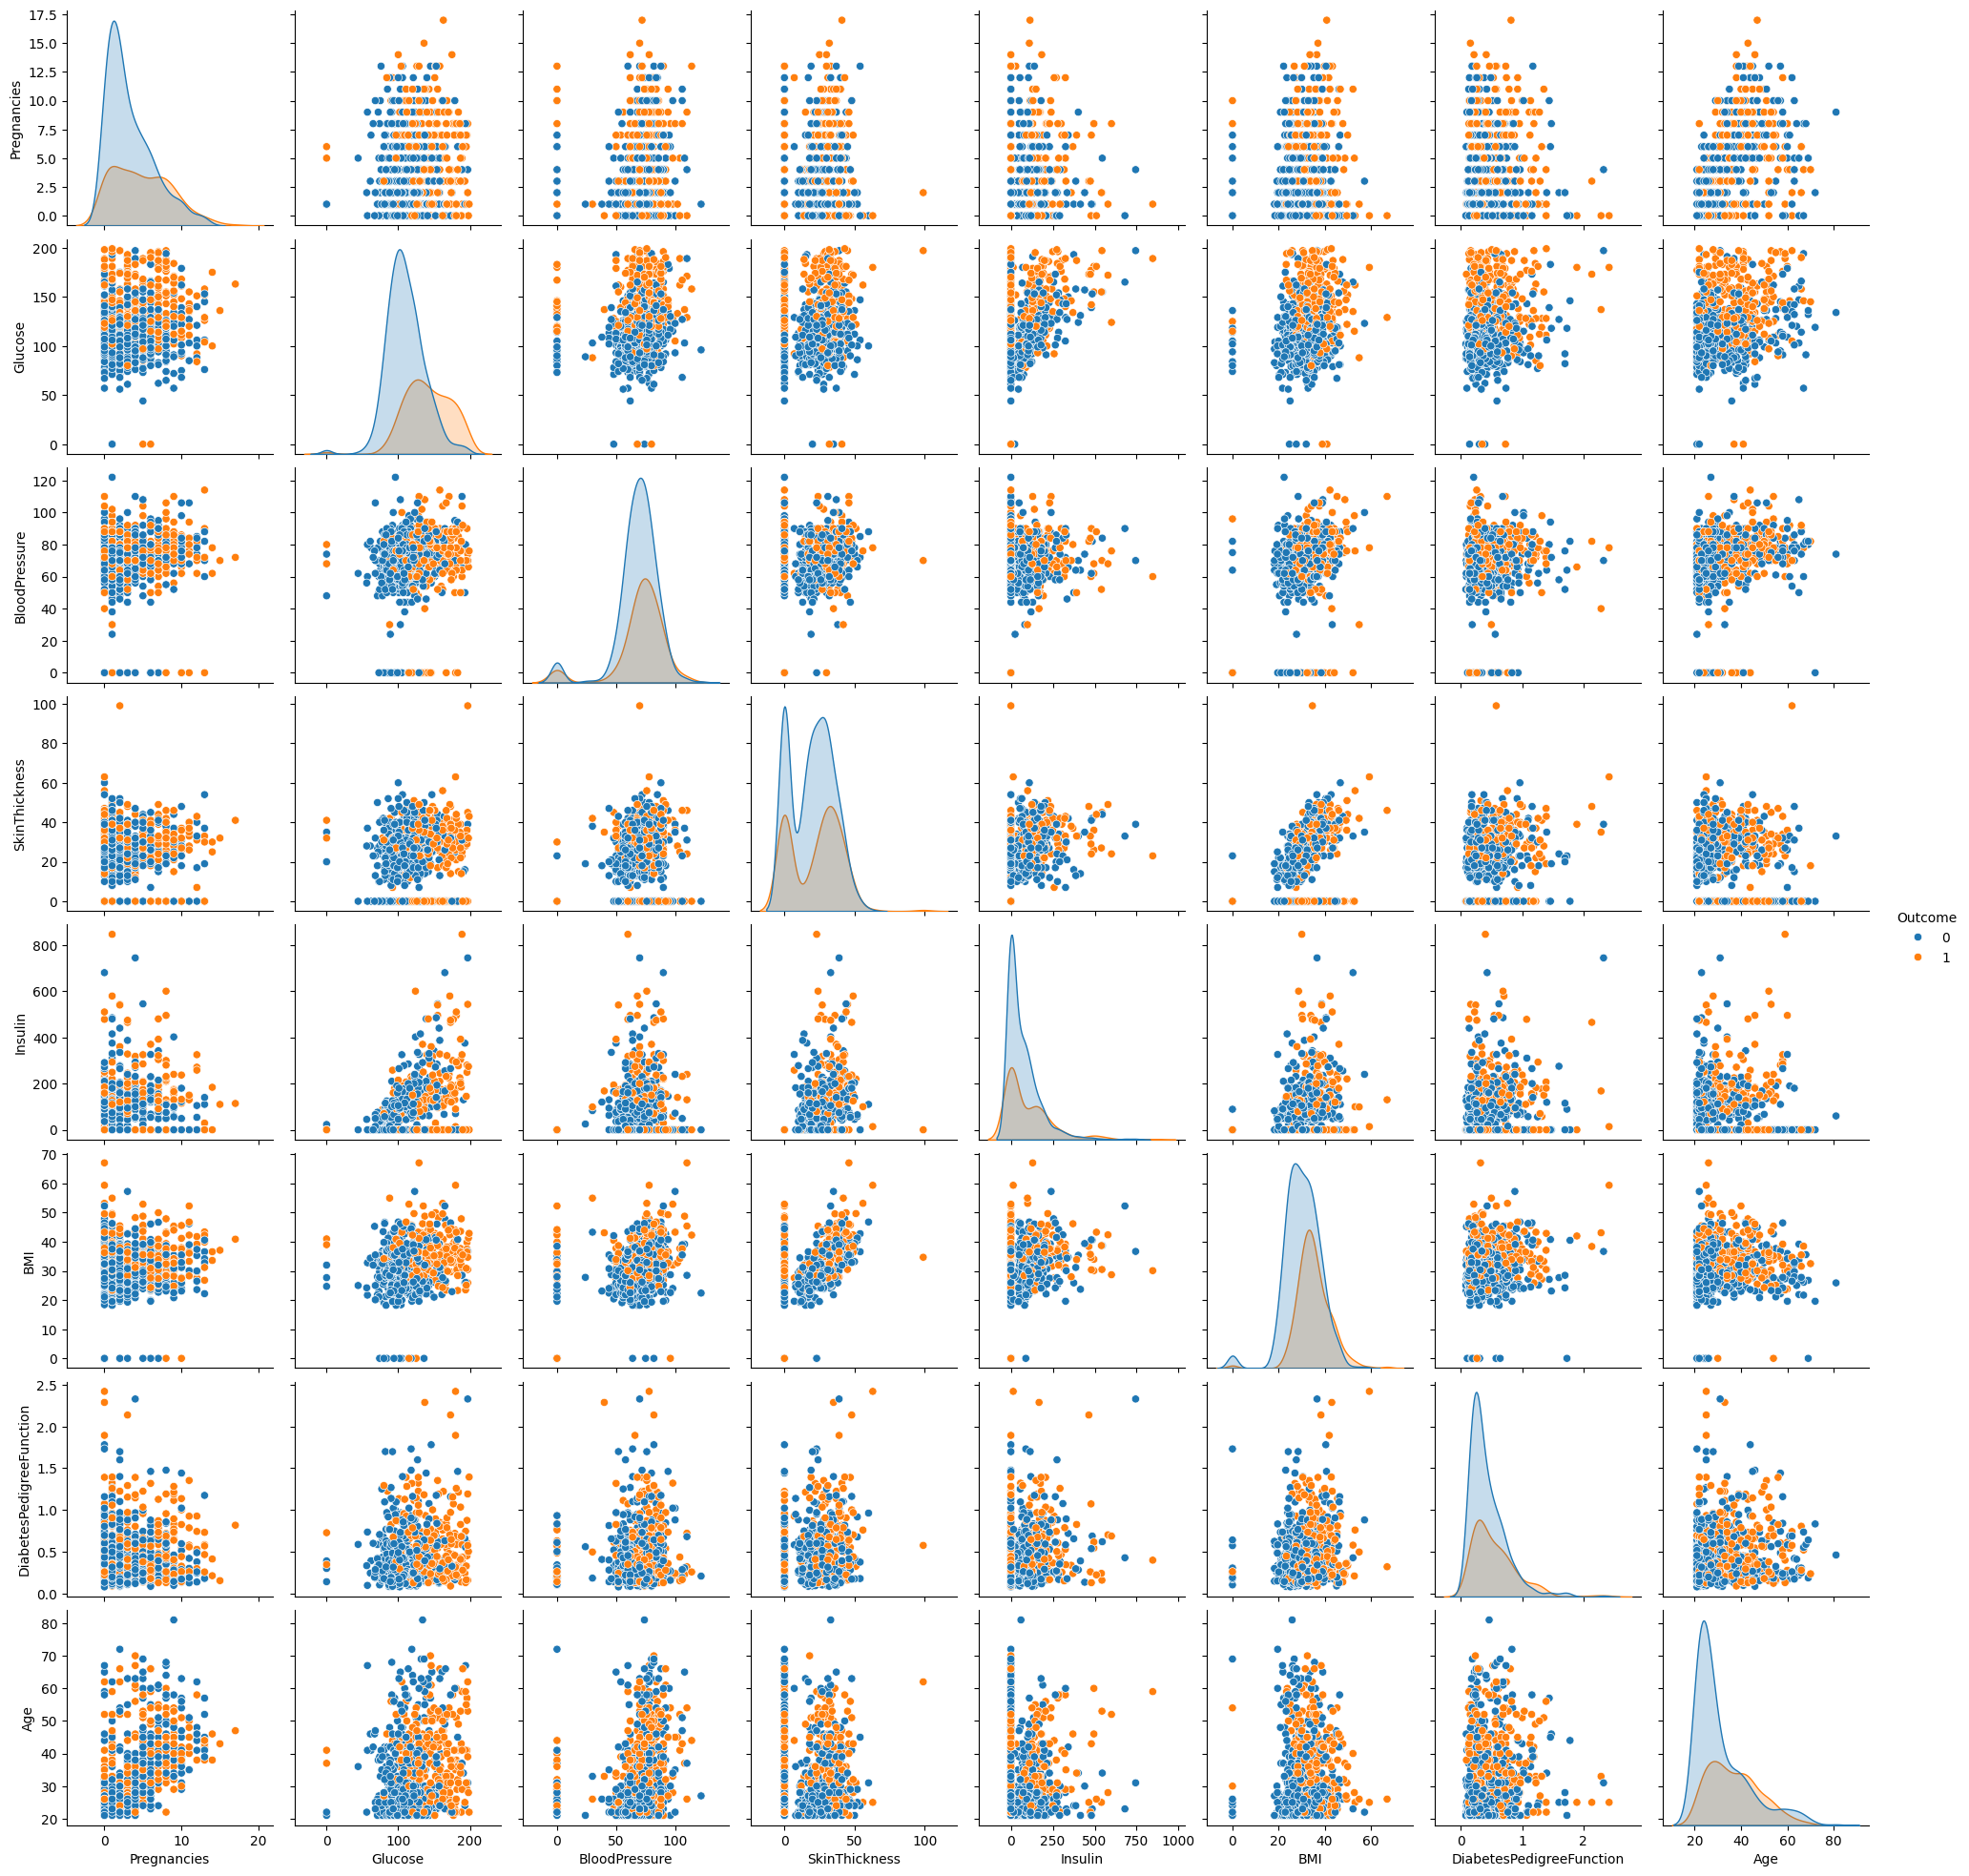

In [12]:
# pairplot
sns.pairplot(df, hue="Outcome")

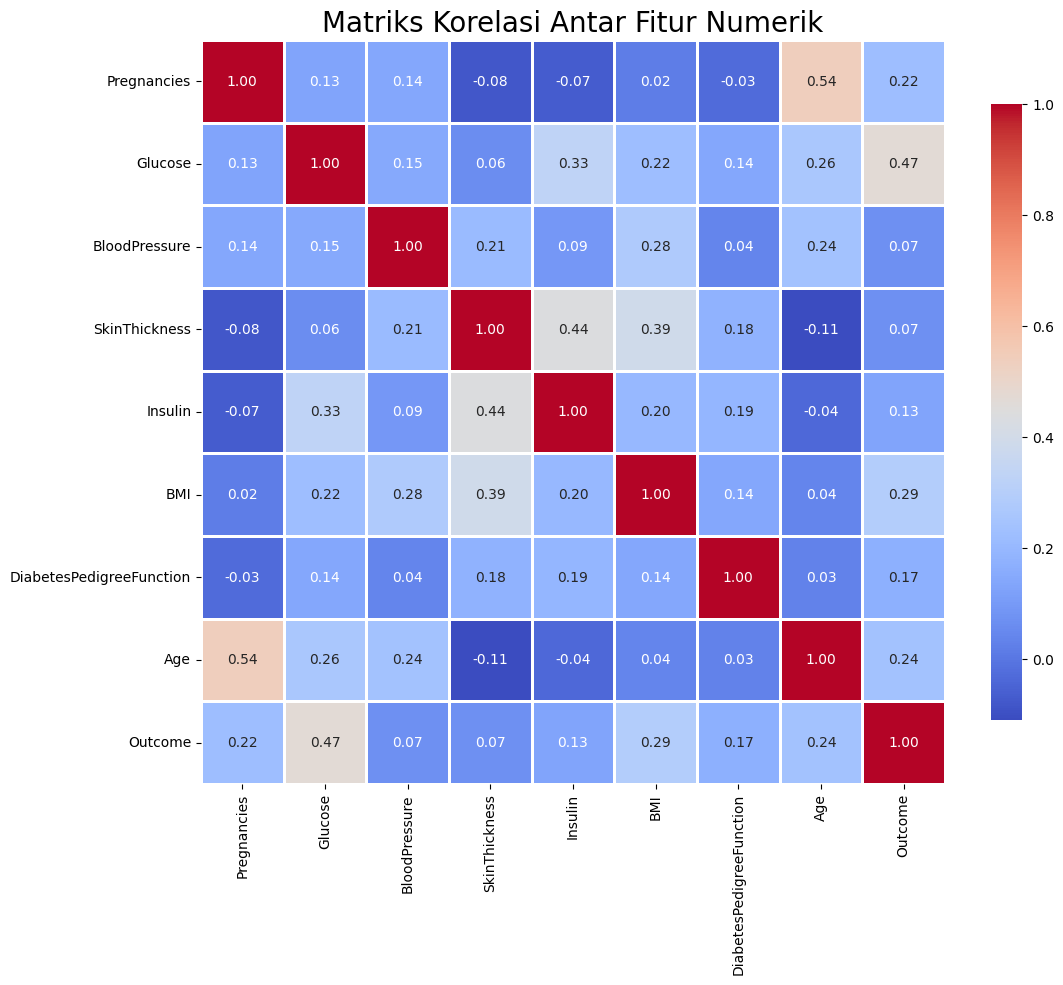

In [13]:
# Membuat figure dengan ukuran yang lebih besar
plt.figure(figsize=(12, 10))

# Menghitung korelasi antar kolom numerik dalam dataframe
correlation_matrix = df.corr().round(2)

# Membuat heatmap untuk matriks korelasi dengan parameter untuk annotasi nilai di setiap kotak
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.8, fmt='.2f',
            cbar_kws={'shrink': 0.8}, square=True, linecolor='white')

# Menambahkan judul dan mengatur ukuran font
plt.title("Matriks Korelasi Antar Fitur Numerik", fontsize=20)

# Menampilkan plot
plt.show()

#### Dalam proyek ini, kita akan mendeteksi outlier menggunakan teknik visualisasi data boxplot. Kemudian, outlier ini akan ditangani menggunakan metode IQR (Inter Quartile Range).

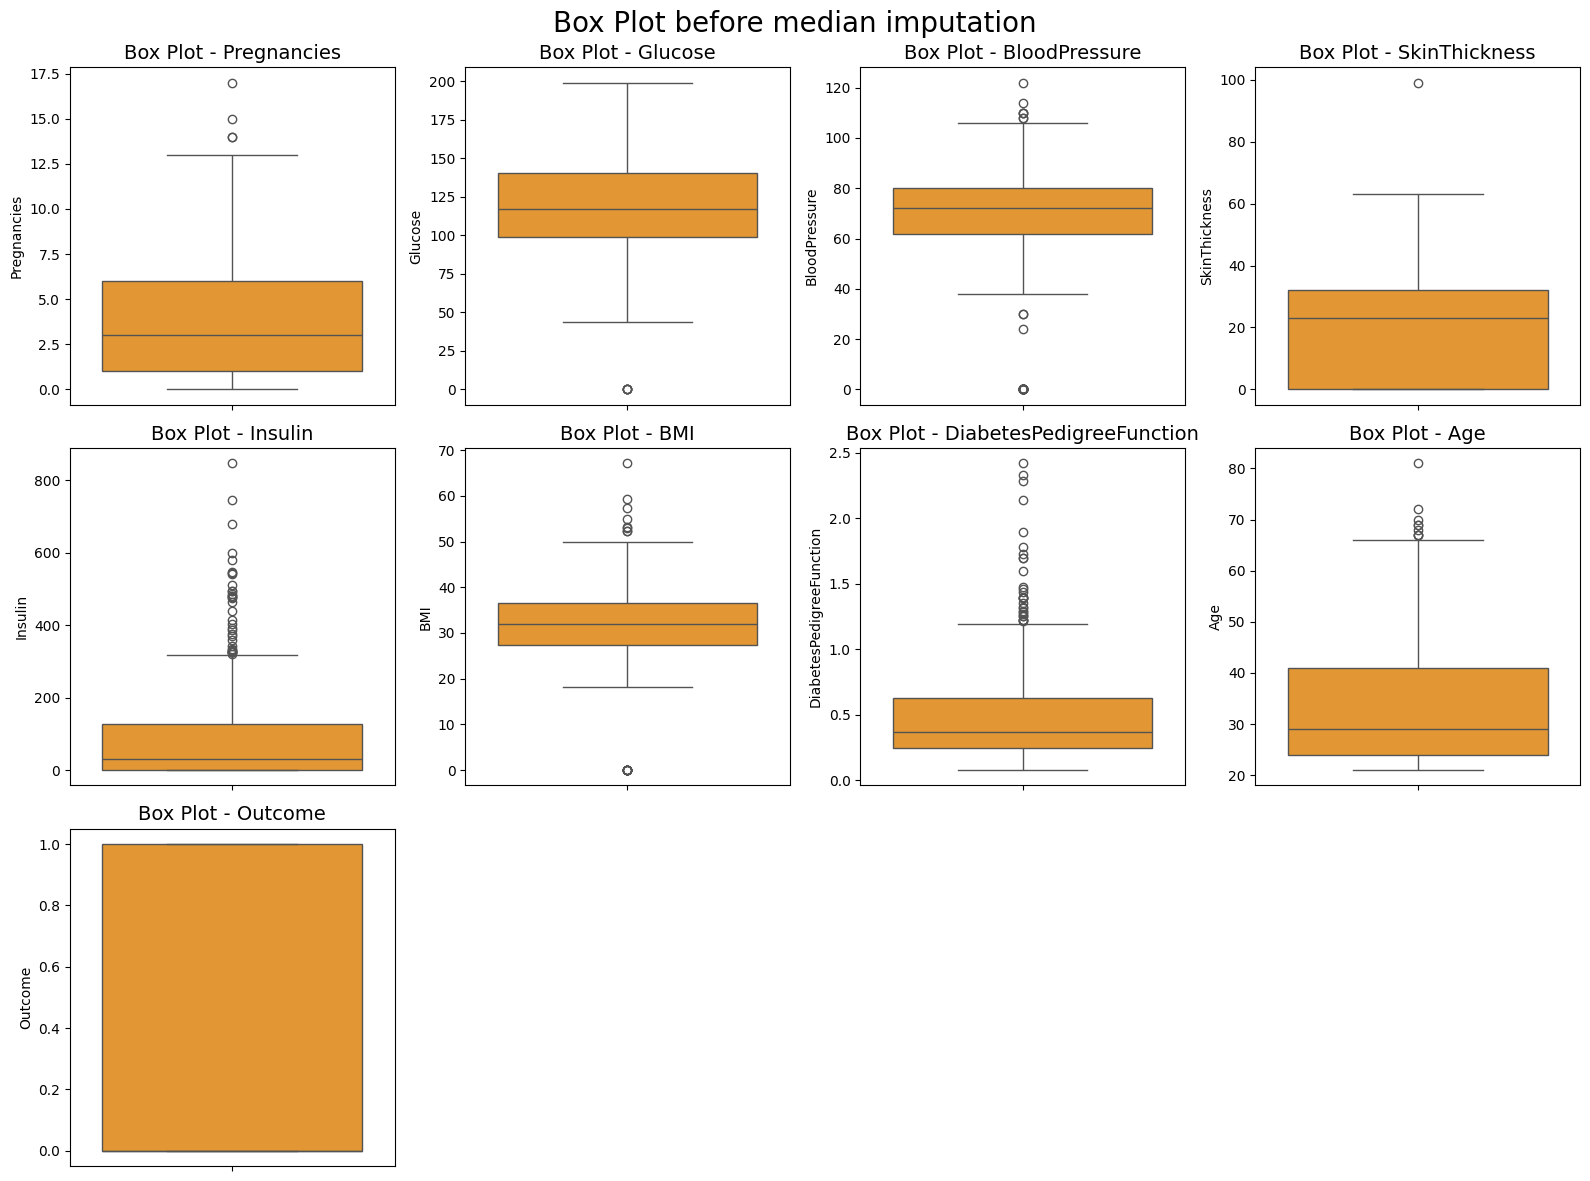

In [14]:
def box_plots_all_columns(df):
    num_cols = len(df.columns)
    num_rows = (num_cols + 3) // 4  # Menentukan jumlah baris berdasarkan jumlah kolom
    fig, axes = plt.subplots(num_rows, 4, figsize=(16, num_rows * 4))
    plt.suptitle("Box Plot before median imputation", fontsize=20)

    for i, column in enumerate(df.columns):
        row = i // 4
        col = i % 4
        sns.boxplot(df[column], ax=axes[row, col], color='#FF9B17')
        axes[row, col].set_title(f"Box Plot - {column}", fontsize=14)

    for i in range(num_cols, num_rows * 4):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

# Panggil fungsi untuk menampilkan box plot
box_plots_all_columns(df)

Dapat dilihat dari visualisasi data di atas bahwa terdapat outlier dalam dataset yang digunakan. Oleh karena itu, perlu dilakukan penanganan terhadap data outlier.

IQR (Interquartile Range) memberi kita gambaran tentang variasi dalam dataset. Setiap nilai yang berada di luar rentang $-1.5 \times IQR$ hingga $1.5 \times IQR$ dianggap sebagai outlier.

* **Q1** mewakili kuartil pertama (25th percentile) dari data.
* **Q2** mewakili kuartil kedua (median/50th percentile) dari data.
* **Q3** mewakili kuartil ketiga (75th percentile) dari data.
* $(Q1 - 1.5 \times IQR)$ mewakili nilai terkecil dalam dataset, dan $(Q3 + 1.5 \times IQR)$ mewakili nilai terbesar dalam dataset.


In [15]:
# Menghitung Q1 (Kuartil pertama) dan Q3 (Kuartil ketiga)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Menghitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Menyaring data dengan menghapus outlier berdasarkan IQR
df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Menampilkan dimensi dataframe setelah menghapus outlier
print(f"Dimensi dataframe setelah pembersihan outlier: {df_cleaned.shape}")

Dimensi dataframe setelah pembersihan outlier: (639, 9)


#### Menampilkan hasil visualisasi data setelah menerapkan teknik IQR

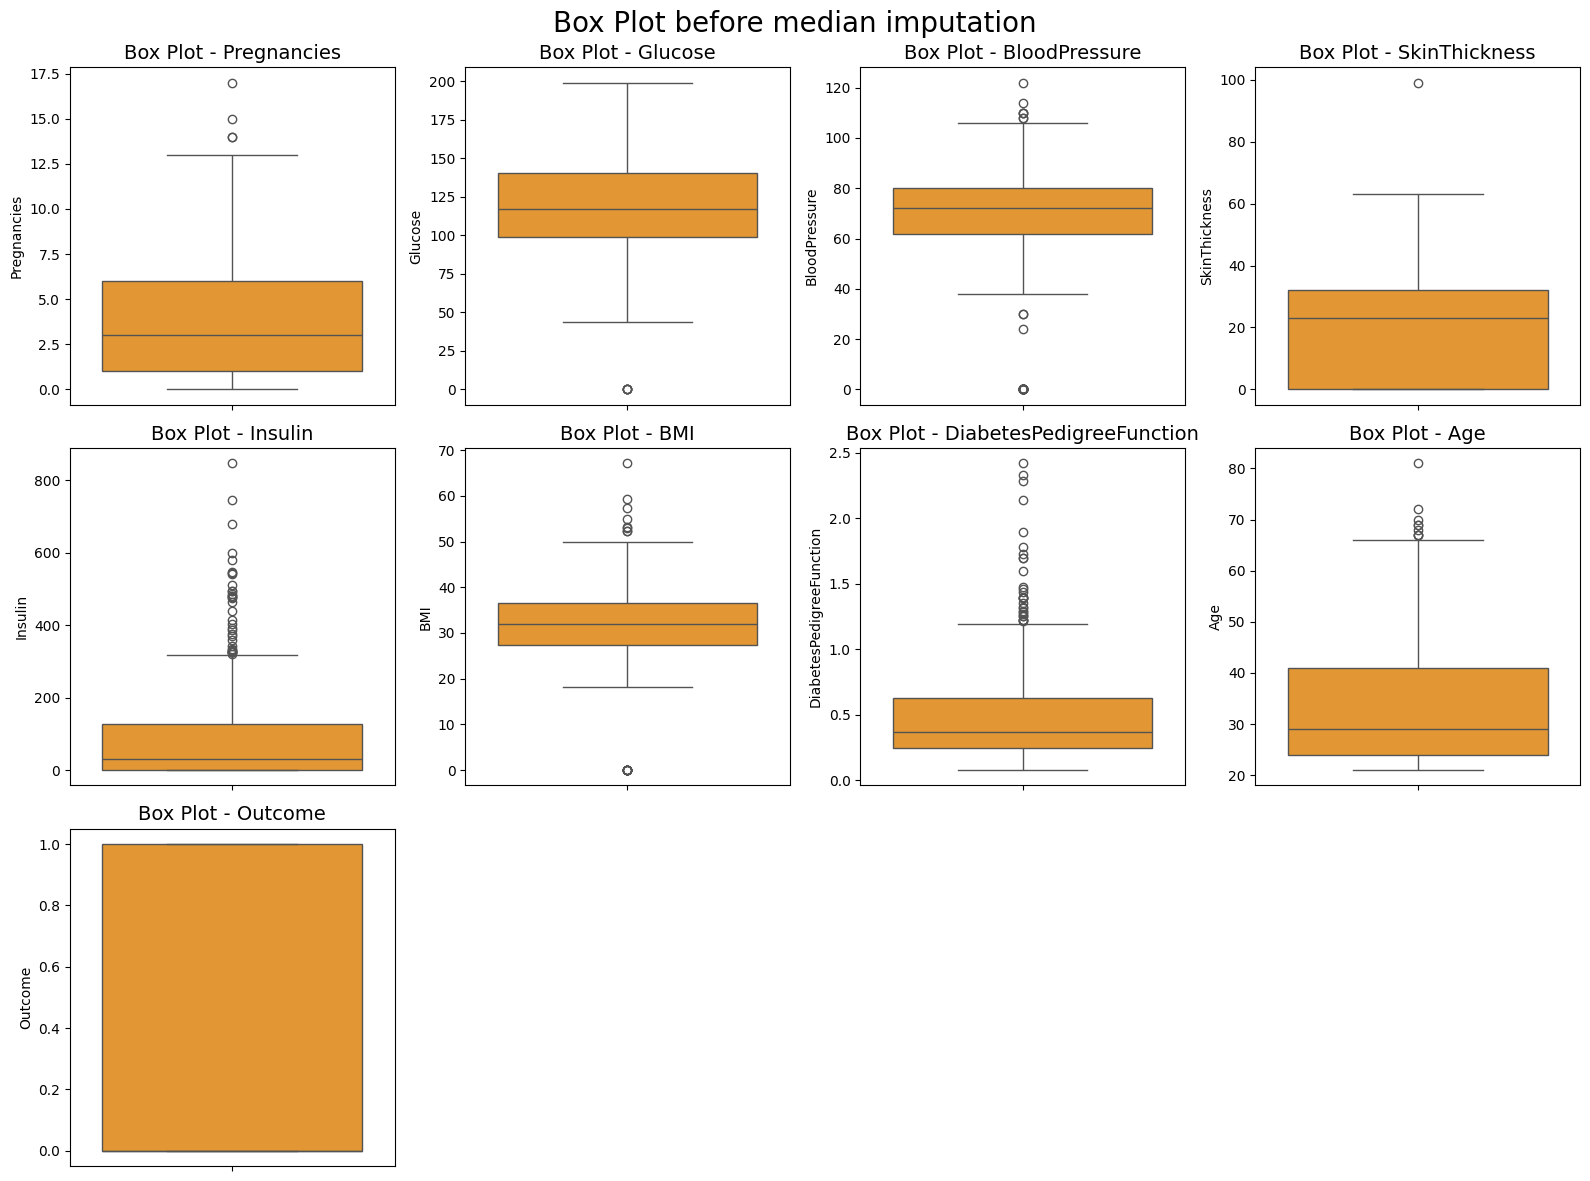

In [16]:
def box_plots_all_columns(df):
    num_cols = len(df.columns)
    num_rows = (num_cols + 3) // 4  # Menentukan jumlah baris berdasarkan jumlah kolom
    fig, axes = plt.subplots(num_rows, 4, figsize=(16, num_rows * 4))
    plt.suptitle("Box Plot before median imputation", fontsize=20)

    for i, column in enumerate(df.columns):
        row = i // 4
        col = i % 4
        sns.boxplot(df[column], ax=axes[row, col], color='#FF9B17')
        axes[row, col].set_title(f"Box Plot - {column}", fontsize=14)

    for i in range(num_cols, num_rows * 4):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

# Panggil fungsi untuk menampilkan box plot
box_plots_all_columns(df)

Berdasarkan hasil perbandingan sebelumnya antara jumlah orang dengan diabetes dan non-diabetes, terlihat bahwa jumlah data orang dengan diabetes hanya 34,9% dan non-diabetes 65,1%. Ini menunjukkan bahwa data yang digunakan tidak seimbang (imbalance data). Oleh karena itu, perlu dilakukan penanganan terhadap data yang tidak seimbang, karena data yang tidak seimbang dapat menghasilkan bias dalam model dan hasil akurasi yang tidak akurat.

Terdapat dua metode untuk menangani data yang tidak seimbang, yaitu oversampling dan undersampling, tergantung pada kasus dan dataset yang digunakan.

**Oversampling**: Digunakan ketika kita memiliki dataset kecil dan ingin mengambil sampel lebih banyak dari kelas minoritas. Oversampling dengan SMOTE dapat membantu meningkatkan akurasi model karena tidak menghilangkan data, tetapi bisa meningkatkan risiko overfitting jika tidak dikelola dengan baik.

**Undersampling**: Digunakan ketika kita memiliki dataset besar dan ingin mengurangi jumlah sampel dari kelas mayoritas. Undersampling dapat membantu mengurangi waktu pelatihan dan meningkatkan keseimbangan kelas, tetapi dapat mengurangi informasi yang berguna jika sampel kelas mayoritas dihapus secara acak.

Dalam kasus ini, kami akan menerapkan metode **oversampling** karena dataset yang digunakan termasuk dalam kategori kecil, sehingga dengan menggunakan metode ini dataset bisa menjadi seimbang.


In [17]:
# Pisahkan fitur (X) dan target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Fungsi untuk melakukan oversampling menggunakan SMOTE
def apply_smote(X, y):
    smote = SMOTE(random_state=42)  # Inisialisasi SMOTE dengan random_state untuk reproduksibilitas
    X_resampled, y_resampled = smote.fit_resample(X, y)  # Melakukan resampling
    return X_resampled, y_resampled

# Terapkan SMOTE untuk oversampling
X_resampled, y_resampled = apply_smote(X, y)

# Hitung distribusi kelas setelah oversampling
class_distribution = Counter(y_resampled)

# Tampilkan distribusi kelas setelah oversampling
print("Distribusi kelas setelah oversampling:")
for label, count in class_distribution.items():
    print(f'Kelas {label}: {count} sampel')

Distribusi kelas setelah oversampling:
Kelas 1: 500 sampel
Kelas 0: 500 sampel


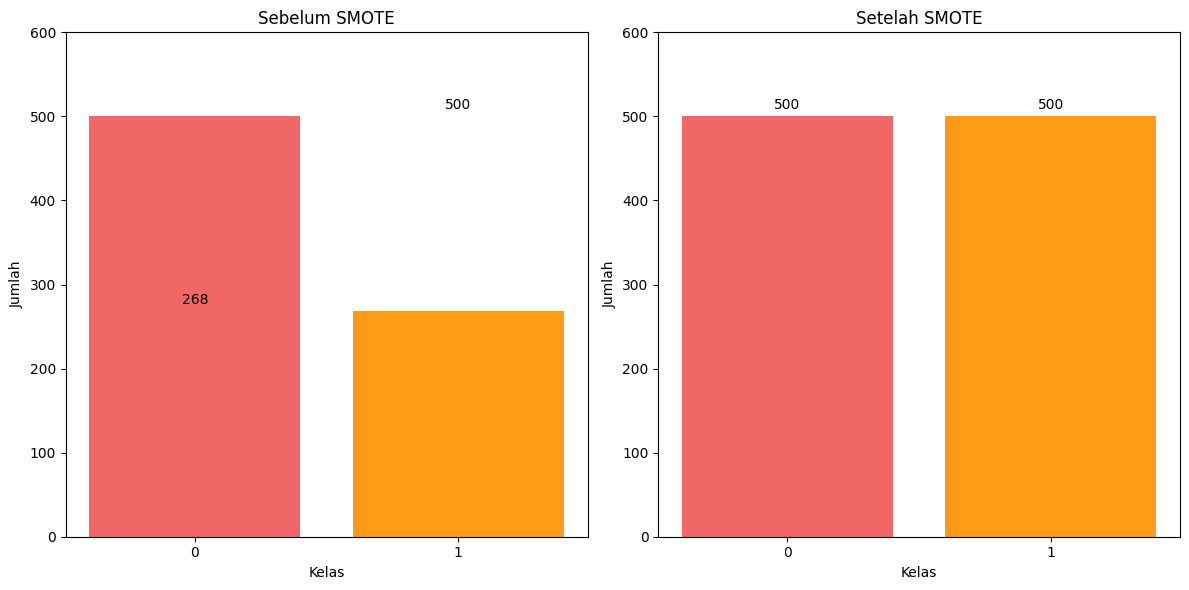

In [18]:
# Hitung distribusi kelas sebelum SMOTE
counter_before = Counter(y)

# Oversampling menggunakan SMOTE
oversample = SMOTE(random_state=42)
X_over, y_over = oversample.fit_resample(X, y)
counter_over = Counter(y_over)

# Visualisasi untuk membandingkan distribusi sebelum dan setelah SMOTE
plt.figure(figsize=(12, 6))

# Sebelum SMOTE
plt.subplot(1, 2, 1)
colors = ['#FF9B17', '#F16767']  # Gunakan warna oranye dan hijau
plt.bar(counter_before.keys(), counter_before.values(), color=colors)
plt.xticks([0, 1])
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.title('Sebelum SMOTE')
plt.ylim([0, max(counter_before.values()) + 100])

for i, v in enumerate(counter_before.values()):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')

# Setelah SMOTE
plt.subplot(1, 2, 2)
plt.bar(counter_over.keys(), counter_over.values(), color=colors)
plt.xticks([0, 1])
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.title('Setelah SMOTE')
plt.ylim([0, max(counter_over.values()) + 100])

for i, v in enumerate(counter_over.values()):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')

# Menata layout dan menampilkan plot
plt.tight_layout()
plt.show()

Data yang tidak seimbang (imbalanced data) telah berhasil ditangani, data sekarang sudah seimbang dan siap digunakan untuk tahap pengembangan model.

## Data splitting

Tahap selanjutnya adalah membagi dataset menjadi data latih (train) dan data uji (test). Data latih akan digunakan dalam proses pelatihan model, dan data uji akan digunakan untuk menguji atau mengetahui seberapa baik model yang telah dibuat dapat menggeneralisasi data baru yang belum pernah dilihat sebelumnya.

Setelah melakukan beberapa percobaan(sebelumya aku 80:20), dalam kasus ini dataset akan dibagi dengan proporsi 70:30, yaitu data latih (70%) dan data uji (30%).

In [19]:
# Pisahkan dataset menjadi fitur (X) dan target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Pembagian data dengan proporsi 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Menampilkan bentuk data latih dan data uji
print("Data Latih (Train):", X_train.shape)
print("Data Uji (Test):", X_test.shape)

Data Latih (Train): (537, 8)
Data Uji (Test): (231, 8)


## Standardisasi

Sebelum mengembangkan model machine learning, proses standardisasi dilakukan terlebih dahulu. Tahapan ini digunakan untuk memproses fitur numerik dalam data agar memiliki nilai rata-rata 0 dan deviasi standar 1. Salah satu tujuan standardisasi adalah karena banyak algoritma machine learning yang bekerja lebih baik atau lebih stabil ketika fitur numerik berada dalam skala yang sama. Dengan standardisasi, fitur-fitur ini diperlakukan secara seragam, yang dapat meningkatkan kinerja model.

In [20]:
# Membuat pipeline untuk standardisasi
num_pipeline = Pipeline([('std_scaler', StandardScaler())])

# Menerapkan standardisasi pada data latih
X_train_prepared = num_pipeline.fit_transform(X_train)

# Menerapkan standardisasi pada data uji (hanya transformasi, tanpa fitting)
X_test_prepared = num_pipeline.transform(X_test)

## Modelling & Evaluate

Train Accuracy Score: 87.52%
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       349
           1       0.89      0.74      0.81       188

    accuracy                           0.88       537
   macro avg       0.88      0.84      0.86       537
weighted avg       0.88      0.88      0.87       537



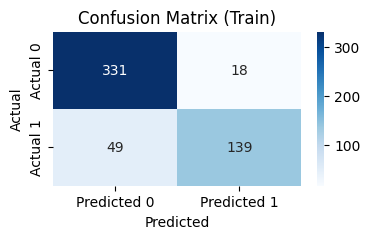

Test Accuracy Score: 74.46%
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.65      0.57      0.61        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



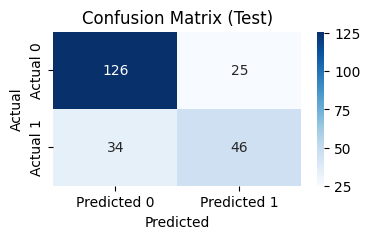

In [21]:
# Fungsi untuk mengevaluasi performa model dengan classification report dan confusion matrix
def evaluate(clf, X_train, y_train, X_test, y_test, train=False):
    # Ambil label unik dari data latih atau uji (untuk label confusion matrix nanti)
    classes = y_train.unique() if train else y_test.unique()

    # Tentukan tipe data evaluasi: Train atau Test
    data_type = "Train" if train else "Test"

    # Prediksi menggunakan model berdasarkan flag `train`
    pred_func = clf.predict(X_train) if train else clf.predict(X_test)

    # Buat classification report dan hitung akurasi
    clf_report = classification_report(y_train, pred_func) if train else classification_report(y_test, pred_func)
    accuracy = accuracy_score(y_train, pred_func) * 100 if train else accuracy_score(y_test, pred_func) * 100

    # Buat confusion matrix dari hasil prediksi
    cm = confusion_matrix(y_train, pred_func) if train else confusion_matrix(y_test, pred_func)

    # Visualisasi confusion matrix dengan heatmap
    plt.figure(figsize=(4, 2))
    sns.heatmap(
        cm,
        annot=True,
        cmap='Blues',
        fmt='g',
        xticklabels=[f'Predicted {class_name}' for class_name in classes],
        yticklabels=[f'Actual {class_name}' for class_name in classes]
    )

    # Tampilkan hasil evaluasi
    print(f"{data_type} Accuracy Score: {accuracy:.2f}%")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ({data_type})')
    plt.show()

# Inisialisasi model Random Forest dengan hyperparameter spesifik
random_forest_model = RandomForestClassifier(
    n_estimators=50,      # Jumlah pohon dalam forest
    max_depth=5,          # Kedalaman maksimum tiap pohon
    max_features='sqrt',  # Jumlah fitur maksimum yang dipakai di tiap split
    random_state=42       # Seed untuk hasil yang reproducible
)

# Training model menggunakan data latih
random_forest_model.fit(X_train, y_train)

# Evaluasi performa model di data latih
evaluate(random_forest_model, X_train, y_train, X_test, y_test, train=True)

# Evaluasi performa model di data uji
evaluate(random_forest_model, X_train, y_train, X_test, y_test, train=False)


## Hyperparameter Tuning

In [22]:
# Inisialisasi model dasar Random Forest
base_model = RandomForestClassifier(random_state=123)

# Grid parameter untuk eksplorasi kombinasi hyperparameter terbaik
param_grid = {
    'n_estimators': [50, 100, 200, 300],             # Jumlah pohon dalam hutan
    'max_features': ['auto', 'sqrt', 'log2'],        # Jumlah fitur maksimum yang dipertimbangkan
    'max_depth': [5, 6, 7, 8],                        # Maksimum kedalaman pohon
    'criterion': ['gini', 'entropy']                 # Fungsi untuk mengukur kualitas split
}

# Grid Search dengan 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,               # Gunakan semua core CPU yang tersedia
    verbose=1                # Tampilkan progres training
)

# Proses pencarian hyperparameter terbaik
grid_search.fit(X_train, y_train)

# Tampilkan kombinasi hyperparameter terbaik
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
160 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 200}


In [23]:
# Inisialisasi ulang model dengan hyperparameter terbaik dari GridSearchCV
best_rf_model = RandomForestClassifier(
    random_state=42,
    max_depth=grid_search.best_params_['max_depth'],
    n_estimators=grid_search.best_params_['n_estimators'],
    max_features=grid_search.best_params_['max_features'],
    criterion=grid_search.best_params_['criterion'],
    n_jobs=-1
)

# Fit model terbaik ke data latih
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=200,
                       n_jobs=-1, random_state=42)

Train Accuracy Score: 98.70%
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       349
           1       1.00      0.96      0.98       188

    accuracy                           0.99       537
   macro avg       0.99      0.98      0.99       537
weighted avg       0.99      0.99      0.99       537



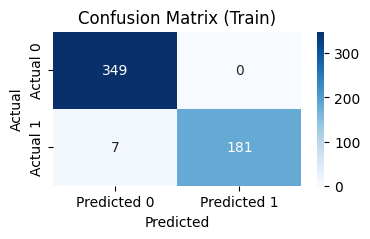

Test Accuracy Score: 75.32%
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       151
           1       0.64      0.68      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



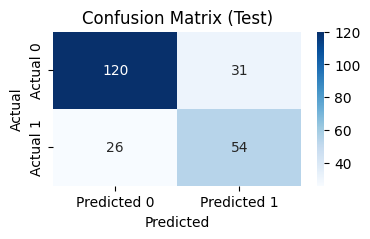

In [24]:
# Evaluasi model pada data latih
evaluate(best_rf_model, X_train, y_train, X_test, y_test, train=True)

# Evaluasi model pada data uji
evaluate(best_rf_model, X_train, y_train, X_test, y_test, train=False)

# BEST MODEL

Berdasarkan hasil evaluasi model:

* Train Accuracy Score: 98.70%
* Test Accuracy Score: 75.32%


